In [2]:
!pip install matplotlib pandas numpy

  Using cached pandas-2.2.2-cp311-cp311-macosx_11_0_arm64.whl.metadata (19 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.9/60.9 kB 1.5 MB/s eta 0:00:00
  Using cached contourpy-1.2.1-cp311-cp311-macosx_11_0_arm64.whl.metadata (5.8 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 6.0 MB/s eta 0:00:00
  Using cached kiwisolver-1.4.5-cp311-cp311-macosx_11_0_arm64.whl.metadata (6.4 kB)
  Using cached pyparsing-3.1.2-py3-none-any.whl.metadata (5.1 kB)
  Using cached pytz-2024.1-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2024.1-py2.py3-none-any.whl.metadata (1.4 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 31.2 MB/s eta 0:00:00a 0:00:01
Using cached pandas-2.2.2-cp311-cp311-macosx_11_0_arm64.whl (11.3 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 36.2 MB/s eta 0:00:00a 0:00:01
Using cached contourpy-1.2.1-cp311-cp311-macosx_11_0_arm64.whl (245 kB)
Using cached cyc

### Setup

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

The following curl commands download the latest version of the three domain-centric collection bundles from GitHub:

In [57]:
!curl -k https://raw.githubusercontent.com/mitre-attack/attack-stix-data/master/enterprise-attack/enterprise-attack.json -o enterprise-attack.json
!curl -k https://raw.githubusercontent.com/mitre-attack/attack-stix-data/master/ics-attack/ics-attack.json -o ics-attack.json
!curl -k https://raw.githubusercontent.com/mitre-attack/attack-stix-data/master/mobile-attack/mobile-attack.json -o mobile-attack.json

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 41.4M  100 41.4M    0     0   978k      0  0:00:43  0:00:43 --:--:-- 1054k     0   961k      0  0:00:44  0:00:11  0:00:33  941k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 3177k  100 3177k    0     0  1865k      0  0:00:01  0:00:01 --:--:-- 1865k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 4287k  100 4287k    0     0  1535k      0  0:00:02  0:00:02 --:--:-- 1535k


In [3]:
dfs = {}

for domain in ["enterprise", "ics", "mobile"]:
    
    print(f"Reading {domain} ...")
    domain_df = pd.read_json(f"{domain}-attack.json")
    
    print(f"Normalizing {domain} ...")
    dfs[domain] = pd.json_normalize(domain_df['objects'])

df = pd.concat([dfs["enterprise"], dfs["ics"], dfs["mobile"]], ignore_index=True)

Reading enterprise ...
Normalizing enterprise ...
Reading ics ...
Normalizing ics ...
Reading mobile ...
Normalizing mobile ...


In [ ]:
# enterprise_attack = pd.read_json('https://raw.githubusercontent.com/mitre-attack/attack-stix-data/master/enterprise-attack/enterprise-attack.json')
# ics_attack = pd.read_json('https://raw.githubusercontent.com/mitre-attack/attack-stix-data/master/ics-attack/ics-attack.json')
# mobile_attack = pd.read_json('https://raw.githubusercontent.com/mitre-attack/attack-stix-data/master/mobile-attack/mobile-attack.json')

# enterprise_df = pd.json_normalize(enterprise_attack['objects'])
# ics_df = pd.json_normalize(ics_attack['objects'])
# mobile_df = pd.json_normalize(mobile_attack['objects'])

# df = pd.concat([enterprise_df, ics_df, mobile_df], ignore_index=True)

# The ignore_index=True parameter is used to reindex the new DataFrame, which is
# particularly useful when the original DataFrames have overlapping indexes. This
# way, you get a single DataFrame df that combines all the STIX objects from the
# enterprise, ICS, and mobile domains, ready for further analysis or processing.

In [4]:
print('Shape:', df.shape)
df.head()

Shape: (25758, 52)


,type,id,spec_version,x_mitre_attack_spec_version,name,x_mitre_version,description,created_by_ref,created,modified,...,target_ref,x_mitre_data_source_ref,x_mitre_collection_layers,tactic_refs,x_mitre_shortname,labels,x_mitre_sectors,x_mitre_related_assets,x_mitre_tactic_type,x_mitre_old_attack_id
0,x-mitre-collection,x-mitre-collection--1f5f1533-f617-4ca8-9ab4-6a...,2.1,2.1.0,Enterprise ATT&CK,15.1,ATT&CK for Enterprise provides a knowledge bas...,identity--c78cb6e5-0c4b-4611-8297-d1b8b55e40b5,2018-01-17T12:56:55.080Z,2024-05-02T14:00:00.188Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,attack-pattern,attack-pattern--0042a9f5-f053-4769-b3ef-9ad018...,2.1,2.1.0,Extra Window Memory Injection,1.0,Adversaries may inject malicious code into pro...,identity--c78cb6e5-0c4b-4611-8297-d1b8b55e40b5,2020-01-14T17:18:32.126Z,2022-04-25T14:00:00.188Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,attack-pattern,attack-pattern--005a06c6-14bf-4118-afa0-ebcd8a...,2.1,3.2.0,Scheduled Task,1.5,Adversaries may abuse the Windows Task Schedul...,identity--c78cb6e5-0c4b-4611-8297-d1b8b55e40b5,2019-11-27T14:58:00.429Z,2023-11-15T14:33:53.354Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,attack-pattern,attack-pattern--005cc321-08ce-4d17-b1ea-cb5275...,2.1,2.1.0,Socket Filters,1.0,Adversaries may attach filters to a network so...,identity--c78cb6e5-0c4b-4611-8297-d1b8b55e40b5,2022-09-30T21:18:41.930Z,2022-11-08T14:00:00.188Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,attack-pattern,attack-pattern--00d0b012-8a03-410e-95de-5826bf...,2.1,2.1.0,Indicator Removal from Tools,1.0,If a malicious tool is detected and quarantine...,identity--c78cb6e5-0c4b-4611-8297-d1b8b55e40b5,2017-05-31T21:30:54.176Z,2022-04-25T14:00:00.188Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# Exclude objects of type 'relationship' and 'marking-definition'
sdos = df[~df['type'].isin(['relationship', 'marking-definition'])]
sros = df[df['type'].isin(['relationship'])]
smos = df[df['type'].isin(['marking-definition'])]
# This code uses the 'isin' method combined with the negation operator '~'to
# exclude rows where the type column matches 'relationship' or
# 'marking-definition'.

# Display the first few rows to verify the filtering
print(sdos.head())

                 type                                                 id  \
0  x-mitre-collection  x-mitre-collection--1f5f1533-f617-4ca8-9ab4-6a...   
1      attack-pattern  attack-pattern--0042a9f5-f053-4769-b3ef-9ad018...   
2      attack-pattern  attack-pattern--005a06c6-14bf-4118-afa0-ebcd8a...   
3      attack-pattern  attack-pattern--005cc321-08ce-4d17-b1ea-cb5275...   
4      attack-pattern  attack-pattern--00d0b012-8a03-410e-95de-5826bf...   

  spec_version x_mitre_attack_spec_version                           name  \
0          2.1                       2.1.0              Enterprise ATT&CK   
1          2.1                       2.1.0  Extra Window Memory Injection   
2          2.1                       3.2.0                 Scheduled Task   
3          2.1                       2.1.0                 Socket Filters   
4          2.1                       2.1.0   Indicator Removal from Tools   

  x_mitre_version                                        description  \
0       

Create a new dataframe for each object type:

In [6]:
object_types = df['type'].unique()

for obj_type in object_types:
    print(f"Initializing {obj_type.replace('-', '_')}_df ...")
    globals()[f"{obj_type.replace('-', '_')}_df"] = df[df['type'] == obj_type]

print("Initializing software_df ...")
software_df = pd.concat([tool_df, malware_df])

Initializing x_mitre_collection_df ...
Initializing attack_pattern_df ...
Initializing campaign_df ...
Initializing course_of_action_df ...
Initializing identity_df ...
Initializing intrusion_set_df ...
Initializing malware_df ...
Initializing marking_definition_df ...
Initializing relationship_df ...
Initializing tool_df ...
Initializing x_mitre_data_component_df ...
Initializing x_mitre_data_source_df ...
Initializing x_mitre_matrix_df ...
Initializing x_mitre_tactic_df ...
Initializing x_mitre_asset_df ...
Initializing software_df ...


In [7]:
sdos[sdos['type'] == 'identity'].identity_class

1076     organization
21697    organization
23610    organization
Name: identity_class, dtype: object

Next, we experiment with `name`, showing how many objects have a `name` field.

In [7]:
# Filter objects with and without a 'name' property
objects_with_name = df[df['name'].notna()]
objects_without_name = df[df['name'].isna()]

with_name_ratio = (objects_with_name.shape[0] / df.shape[0]) * 100

print(f'There are {objects_with_name.shape[0]} objects with a "name" property, which is {with_name_ratio}% of all objects.')

There are 2789 objects with a "name" property, which is 10.827704014286823% of all objects.


We can show how many objects have a `name` field conditioned on `type`:

In [8]:
# Analyze type distribution for objects with a 'name'
print("Type distribution for objects with a 'name':")
print(objects_with_name['type'].value_counts())

# Analyze type distribution for objects without a 'name'
print("\nType distribution for objects without a 'name':")
print(objects_without_name['type'].value_counts())

Type distribution for objects with a 'name':
type
attack-pattern            1062
malware                    736
course-of-action           385
intrusion-set              195
x-mitre-data-component     161
tool                        88
x-mitre-data-source         61
x-mitre-tactic              40
campaign                    37
x-mitre-asset               14
x-mitre-matrix               4
x-mitre-collection           3
identity                     3
Name: count, dtype: int64

Type distribution for objects without a 'name':
type
relationship          22966
marking-definition        3
Name: count, dtype: int64


The following functions count up the number of objects with the specified field (passed as an argument) conditioned on a configurable column, `sort_by_column`:

In [9]:
def objects_with(df, property_name, sort_by_column):
    objects_with = df[df[property_name].notna().explode()]
    display(objects_with[sort_by_column].value_counts())

def objects_without(df, property_name, sort_by_column):
    objects_without = df[df[property_name].isna()]
    display(objects_without[sort_by_column].value_counts())

In [16]:
from IPython.display import display, HTML, Markdown
import pandas as pd
from collections import Counter

def flatten_if_list(series):
    if series.dtype == 'object' and series.apply(lambda x: isinstance(x, list)).any():
        return series.explode()
    return series

def get_value_counts(series, max_categories=15):
    flattened = flatten_if_list(series)
    counts = Counter(flattened.dropna())
    if len(counts) <= max_categories:
        return pd.Series(counts).sort_values(ascending=False)
    else:
        return pd.Series(dict(counts.most_common(max_categories)))

def objects_with(df, property_name, sort_by_column, max_categories=15):
    objects_with = df[df[property_name].notna()]
    value_counts = get_value_counts(objects_with[sort_by_column], max_categories)
    
    display(Markdown(f"### Objects with '{property_name}' (sorted by '{sort_by_column}')"))
    if len(value_counts) == max_categories:
        display(Markdown(f"*Showing top {max_categories} categories.*"))
    display(value_counts.to_frame().style.bar(color='#5fba7d'))

def objects_without(df, property_name, sort_by_column, max_categories=15):
    objects_without = df[df[property_name].isna()]
    value_counts = get_value_counts(objects_without[sort_by_column], max_categories)
    
    display(Markdown(f"### Objects without '{property_name}' (sorted by '{sort_by_column}')"))
    if len(value_counts) == max_categories:
        display(Markdown(f"*Showing top {max_categories} categories.*"))
    display(value_counts.to_frame().style.bar(color='#d65f5f'))

property_of_interest = 'x_mitre_permissions_required'
sort_by_column = 'type'

columns_some_null = attack_pattern_df.columns[(attack_pattern_df.isna().any()) & (~attack_pattern_df.isna().all())].tolist()
columns_without_null = attack_pattern_df.columns[~attack_pattern_df.isna().any()].tolist()

display(Markdown("## Columns with some null values"))
display(columns_some_null)

for col in columns_some_null + columns_without_null:
    display(Markdown(f"## Analysis for column: {col}"))
    try:
        objects_with(attack_pattern_df, property_of_interest, col)
        objects_without(attack_pattern_df, property_of_interest, col)
    except Exception as e:
        display(Markdown(f"**Error processing column '{col}': {str(e)}**"))
    display(HTML("<hr style='border: 2px solid #ccc;'>"))

## Columns with some null values

['description',
 'created_by_ref',
 'object_marking_refs',
 'x_mitre_platforms',
 'kill_chain_phases',
 'x_mitre_detection',
 'x_mitre_modified_by_ref',
 'x_mitre_data_sources',
 'x_mitre_defense_bypassed',
 'x_mitre_contributors',
 'x_mitre_deprecated',
 'x_mitre_permissions_required',
 'x_mitre_remote_support',
 'revoked',
 'x_mitre_system_requirements',
 'x_mitre_impact_type',
 'x_mitre_effective_permissions',
 'x_mitre_network_requirements',
 'x_mitre_tactic_type']

## Analysis for column: description

### Objects with 'x_mitre_permissions_required' (sorted by 'description')

*Showing top 15 categories.*

,0
"An adversary may revert changes made to a cloud instance after they have performed malicious activities in attempt to evade detection and remove evidence of their presence. In highly virtualized environments, such as cloud-based infrastructure, this may be accomplished by restoring virtual machine (VM) or data storage snapshots through the cloud management dashboard or cloud APIs. Another variation of this technique is to utilize temporary storage attached to the compute instance. Most cloud providers provide various types of storage including persistent, local, and/or ephemeral, with the ephemeral types often reset upon stop/restart of the VM.(Citation: Tech Republic - Restore AWS Snapshots)(Citation: Google - Restore Cloud Snapshot)",2
"Adversaries may abuse the Windows Task Scheduler to perform task scheduling for initial or recurring execution of malicious code. There are multiple ways to access the Task Scheduler in Windows. The [schtasks](https://attack.mitre.org/software/S0111) utility can be run directly on the command line, or the Task Scheduler can be opened through the GUI within the Administrator Tools section of the Control Panel. In some cases, adversaries have used a .NET wrapper for the Windows Task Scheduler, and alternatively, adversaries have used the Windows netapi32 library to create a scheduled task. The deprecated [at](https://attack.mitre.org/software/S0110) utility could also be abused by adversaries (ex: [At](https://attack.mitre.org/techniques/T1053/002)), though at.exe can not access tasks created with schtasks or the Control Panel. An adversary may use Windows Task Scheduler to execute programs at system startup or on a scheduled basis for persistence. The Windows Task Scheduler can also be abused to conduct remote Execution as part of Lateral Movement and/or to run a process under the context of a specified account (such as SYSTEM). Similar to [System Binary Proxy Execution](https://attack.mitre.org/techniques/T1218), adversaries have also abused the Windows Task Scheduler to potentially mask one-time execution under signed/trusted system processes.(Citation: ProofPoint Serpent) Adversaries may also create ""hidden"" scheduled tasks (i.e. [Hide Artifacts](https://attack.mitre.org/techniques/T1564)) that may not be visible to defender tools and manual queries used to enumerate tasks. Specifically, an adversary may hide a task from `schtasks /query` and the Task Scheduler by deleting the associated Security Descriptor (SD) registry value (where deletion of this value must be completed using SYSTEM permissions).(Citation: SigmaHQ)(Citation: Tarrask scheduled task) Adversaries may also employ alternate methods to hide tasks, such as altering the metadata (e.g., `Index` value) within associated registry keys.(Citation: Defending Against Scheduled Task Attacks in Windows Environments)",1
"A bootkit is a malware variant that modifies the boot sectors of a hard drive, including the Master Boot Record (MBR) and Volume Boot Record (VBR). (Citation: MTrends 2016) Adversaries may use bootkits to persist on systems at a layer below the operating system, which may make it difficult to perform full remediation unless an organization suspects one was used and can act accordingly. ### Master Boot Record The MBR is the section of disk that is first loaded after completing hardware initialization by the BIOS. It is the location of the boot loader. An adversary who has raw access to the boot drive may overwrite this area, diverting execution during startup from the normal boot loader to adversary code. (Citation: Lau 2011) ### Volume Boot Record The MBR passes control of the boot process to the VBR. Similar to the case of MBR, an adversary who has raw access to the boot drive may overwrite the VBR to divert execution during startup to adversary code.",1
"Adversaries may implement hidden windows to conceal malicious activity from the plain sight of users. In some cases, windows that would typically be displayed wh

### Objects without 'x_mitre_permissions_required' (sorted by 'description')

*Showing top 15 categories.*

,0
"Adversaries may explicitly employ a known encryption algorithm to conceal command and control traffic rather than relying on any inherent protections provided by a communication protocol. Despite the use of a secure algorithm, these implementations may be vulnerable to reverse engineering if necessary secret keys are encoded and/or generated within malware samples/configuration files.",2
Adversaries may steal data by exfiltrating it over an existing command and control channel. Stolen data is encoded into the normal communications channel using the same protocol as command and control communications.,2
"Adversaries may attempt to avoid detection by hiding malicious behavior from the user. By doing this, an adversary’s modifications would most likely remain installed on the device for longer, allowing the adversary to continue to operate on that device. While there are many ways this can be accomplished, one method is by using the device’s sensors. By utilizing the various motion sensors on a device, such as accelerometer or gyroscope, an application could detect that the device is being interacted with. That way, the application could continue to run while the device is not in use but cease operating while the user is using the device, hiding anything that would indicate malicious activity was ongoing. Accessing the sensors in this way does not require any permissions from the user, so it would be completely transparent.",2
"Adversaries may inject malicious code into process via Extra Window Memory (EWM) in order to evade process-based defenses as well as possibly elevate privileges. EWM injection is a method of executing arbitrary code in the address space of a separate live process. Before creating a window, graphical Windows-based processes must prescribe to or register a windows class, which stipulate appearance and behavior (via windows procedures, which are functions that handle input/output of data).(Citation: Microsoft Window Classes) Registration of new windows classes can include a request for up to 40 bytes of EWM to be appended to the allocated memory of each instance of that class. This EWM is intended to store data specific to that window and has specific application programming interface (API) functions to set and get its value. (Citation: Microsoft GetWindowLong function) (Citation: Microsoft SetWindowLong function) Although small, the EWM is large enough to store a 32-bit pointer and is often used to point to a windows procedure. Malware may possibly utilize this memory location in part of an attack chain that includes writing code to shared sections of the process’s memory, placing a pointer to the code in EWM, then invoking execution by returning execution control to the address in the process’s EWM. Execution granted through EWM injection may allow access to both the target process's memory and possibly elevated privileges. Writing payloads to shared sections also avoids the use of highly monitored API calls such as WriteProcessMemory and CreateRemoteThread.(Citation: Elastic Process Injection July 2017) More sophisticated malware samples may also potentially bypass protection mechanisms such as data execution prevention (DEP) by triggering a combination of windows procedures and other system functions that will rewrite the malicious payload inside an executable portion of the target process. (Citation: MalwareTech Power Loader Aug 2013) (Citation: WeLiveSecurity Gapz and Redyms Mar 2013) Running code in the context of another process may allow access to the process's memory, system/network resources, and possibly elevated privileges. Execution via EWM injection may also evade detection from security products since the execution is masked under a legitimate process.",1
"Adversaries may attach filters to a network socket to monitor then activate backdoors used for persistence or command and control. With elevated permissions, adversaries can use features such as the `libpcap` library to open sockets and 

## Analysis for column: created_by_ref

### Objects with 'x_mitre_permissions_required' (sorted by 'created_by_ref')

,0
identity--c78cb6e5-0c4b-4611-8297-d1b8b55e40b5,273


### Objects without 'x_mitre_permissions_required' (sorted by 'created_by_ref')

,0
identity--c78cb6e5-0c4b-4611-8297-d1b8b55e40b5,773


## Analysis for column: object_marking_refs

### Objects with 'x_mitre_permissions_required' (sorted by 'object_marking_refs')

,0
marking-definition--fa42a846-8d90-4e51-bc29-71d5b4802168,273


### Objects without 'x_mitre_permissions_required' (sorted by 'object_marking_refs')

,0
marking-definition--fa42a846-8d90-4e51-bc29-71d5b4802168,774


## Analysis for column: x_mitre_platforms

### Objects with 'x_mitre_permissions_required' (sorted by 'x_mitre_platforms')

,0
Windows,192
macOS,112
Linux,91
Network,19
IaaS,16
Office 365,14
Containers,9
Azure AD,8
SaaS,8
Google Workspace,6


### Objects without 'x_mitre_permissions_required' (sorted by 'x_mitre_platforms')

*Showing top 15 categories.*

,0
Windows,359
macOS,284
Linux,276
Android,169
iOS,123
PRE,91
IaaS,82
None,82
Network,75
Office 365,69


## Analysis for column: kill_chain_phases

**Error processing column 'kill_chain_phases': unhashable type: 'dict'**

## Analysis for column: x_mitre_detection

### Objects with 'x_mitre_permissions_required' (sorted by 'x_mitre_detection')

*Showing top 15 categories.*

,0
Perform integrity checking on MBR and VBR. Take snapshots of MBR and VBR and compare against known good samples. Report changes to MBR and VBR as they occur for indicators of suspicious activity and further analysis.,2
Monitor processes for those that may be used to modify binary headers. Monitor file systems for changes to application binaries and invalid checksums/signatures. Changes to binaries that do not line up with application updates or patches are also extremely suspicious.,2
"Establish centralized logging of instance activity, which can be used to monitor and review system events even after reverting to a snapshot, rolling back changes, or changing persistence/type of storage. Monitor specifically for events related to snapshots and rollbacks and VM configuration changes, that are occurring outside of normal activity. To reduce false positives, valid change management procedures could introduce a known identifier that is logged with the change (e.g., tag or header) if supported by the cloud provider, to help distinguish valid, expected actions from malicious ones.",2
"Look for changes to binaries and service executables that may normally occur during software updates. If an executable is written, renamed, and/or moved to match an existing service executable, it could be detected and correlated with other suspicious behavior. Hashing of binaries and service executables could be used to detect replacement against historical data. Look for abnormal process call trees from typical processes and services and for execution of other commands that could relate to Discovery or other adversary techniques.",2
Forensic techniques exist to detect aspects of files that have had their timestamps modified. (Citation: WindowsIR Anti-Forensic Techniques) It may be possible to detect timestomping using file modification monitoring that collects information on file handle opens and can compare timestamp values.,2
Use process monitoring to monitor the execution and arguments of Regsvcs.exe and Regasm.exe. Compare recent invocations of Regsvcs.exe and Regasm.exe with prior history of known good arguments and executed binaries to determine anomalous and potentially adversarial activity. Command arguments used before and after Regsvcs.exe or Regasm.exe invocation may also be useful in determining the origin and purpose of the binary being executed.,2
Monitor process execution and command-line parameters of .scr files. Monitor changes to screensaver configuration changes in the Registry that may not correlate with typical user behavior. Tools such as Sysinternals Autoruns can be used to detect changes to the screensaver binary path in the Registry. Suspicious paths and PE files may indicate outliers among legitimate screensavers in a network and should be investigated.,2
Use process monitoring to monitor the execution and arguments of InstallUtil.exe. Compare recent invocations of InstallUtil.exe with prior history of known good arguments and executed binaries to determine anomalous and potentially adversarial activity. Command arguments used before and after the InstallUtil.exe invocation may also be useful in determining the origin and purpose of the binary being executed.,2
"Inspect important application binary file hashes, locations, and modifications for suspicious/unexpected values.",2
"Monitor scheduled task creation from common utilities using command-line invocation. Legitimate scheduled tasks may be created during installation of new software or through system administration functions. Look for changes to tasks that do not correlate with known software, patch cycles, etc. Suspicious program execution through scheduled tasks may show up as outlier processes that have not been seen before when compared against historical data. Data and events should not be viewed in isolation, but as part of a chain of behavior that could lead to other activities, such as network connections made for Command and Control, learning details about the

### Objects without 'x_mitre_permissions_required' (sorted by 'x_mitre_detection')

*Showing top 15 categories.*

,0
,157
"Much of this activity may have a very high occurrence and associated false positive rate, as well as potentially taking place outside the visibility of the target organization, making detection difficult for defenders. Detection efforts may be focused on related stages of the adversary lifecycle, such as during Initial Access.",27
"Analyze network data for uncommon data flows (e.g., a client sending significantly more data than it receives from a server). Processes utilizing the network that do not normally have network communication or have never been seen before are suspicious. Analyze packet contents to detect communications that do not follow the expected protocol behavior for the port that is being used. (Citation: University of Birmingham C2)",7
"Analyze network data for uncommon data flows (e.g., a client sending significantly more data than it receives from a server). Processes utilizing the network that do not normally have network communication or have never been seen before are suspicious. Analyze packet contents to detect communications that do not follow the expected protocol behavior for the port that is being used.(Citation: University of Birmingham C2)",4
Monitor logon scripts for unusual access by abnormal users or at abnormal times. Look for files added or modified by unusual accounts outside of normal administration duties. Monitor running process for actions that could be indicative of abnormal programs or executables running upon logon.,3
"Since data encryption is a common practice in many legitimate applications and uses standard programming language-specific APIs, encrypting data for command and control communication is regarded as undetectable to the user.",3
"Application vetting services may provide a list of connections made or received by an application, or a list of domains contacted by the application.",3
"The first detection of a malicious tool may trigger an anti-virus or other security tool alert. Similar events may also occur at the boundary through network IDS, email scanning appliance, etc. The initial detection should be treated as an indication of a potentially more invasive intrusion. The alerting system should be thoroughly investigated beyond that initial alert for activity that was not detected. Adversaries may continue with an operation, assuming that individual events like an anti-virus detect will not be investigated or that an analyst will not be able to conclusively link that event to other activity occurring on the network.",2
"Monitor authentication logs for system and application login failures of [Valid Accounts](https://attack.mitre.org/techniques/T1078). If authentication failures are high, then there may be a brute force attempt to gain access to a system using legitimate credentials.",2
"Monitor script processes, such as `cscript`, and command-line parameters for scripts like PubPrn.vbs that may be used to proxy execution of malicious files.",2


## Analysis for column: x_mitre_modified_by_ref

### Objects with 'x_mitre_permissions_required' (sorted by 'x_mitre_modified_by_ref')

,0
identity--c78cb6e5-0c4b-4611-8297-d1b8b55e40b5,273


### Objects without 'x_mitre_permissions_required' (sorted by 'x_mitre_modified_by_ref')

,0
identity--c78cb6e5-0c4b-4611-8297-d1b8b55e40b5,774


## Analysis for column: x_mitre_data_sources

### Objects with 'x_mitre_permissions_required' (sorted by 'x_mitre_data_sources')

*Showing top 15 categories.*

,0
Command: Command Execution,85
Process: Process Creation,77
File: File Modification,52
File: File Creation,41
Windows Registry: Windows Registry Key Modification,32
Process: OS API Execution,30
Module: Module Load,24
Network Traffic: Network Traffic Content,15
Network Traffic: Network Traffic Flow,12
Application Log: Application Log Content,12


### Objects without 'x_mitre_permissions_required' (sorted by 'x_mitre_data_sources')

*Showing top 15 categories.*

,0
Command: Command Execution,211
Process: Process Creation,190
Network Traffic: Network Traffic Content,132
Network Traffic: Network Traffic Flow,105
Application Log: Application Log Content,104
Process: OS API Execution,77
File: File Creation,65
File: File Modification,61
Network Traffic: Network Connection Creation,53
File: File Access,49


## Analysis for column: x_mitre_defense_bypassed

### Objects with 'x_mitre_permissions_required' (sorted by 'x_mitre_defense_bypassed')

*Showing top 15 categories.*

,0
Anti-virus,20
Process whitelisting,12
Digital Certificate Validation,12
Application whitelisting,10
Application control,10
Host forensic analysis,9
Host intrusion prevention systems,6
Whitelisting by file name or path,5
Windows User Account Control,4
Signature-based detection,4


### Objects without 'x_mitre_permissions_required' (sorted by 'x_mitre_defense_bypassed')

*Showing top 15 categories.*

,0
Anti-virus,45
Application control,17
Application Control,17
Digital Certificate Validation,15
Signature-based detection,14
Host forensic analysis,13
Log analysis,10
Host intrusion prevention systems,10
Static File Analysis,8
System Access Controls,7


## Analysis for column: x_mitre_contributors

### Objects with 'x_mitre_permissions_required' (sorted by 'x_mitre_contributors')

*Showing top 15 categories.*

,0
"Travis Smith, Tripwire",19
Praetorian,15
Stefan Kanthak,12
Casey Smith,8
Vincent Le Toux,8
"Matthew Demaske, Adaptforward",7
Anastasios Pingios,5
"Ye Yint Min Thu Htut, Offensive Security Team, DBS Bank",5
"Tony Lambert, Red Canary",4
"Vishwas Manral, McAfee",4


### Objects without 'x_mitre_permissions_required' (sorted by 'x_mitre_contributors')

*Showing top 15 categories.*

,0
Praetorian,27
"Austin Clark, @c2defense",23
Goldstein Menachem,13
"Yossi Weizman, Azure Defender Research Team",12
Shailesh Tiwary (Indian Army),10
"Vishwas Manral, McAfee",10
"Liran Ravich, CardinalOps",10
Microsoft Threat Intelligence Center (MSTIC),9
William Cain,9
Mark Wee,8


## Analysis for column: x_mitre_deprecated

### Objects with 'x_mitre_permissions_required' (sorted by 'x_mitre_deprecated')

,0
False,55
True,10


### Objects without 'x_mitre_permissions_required' (sorted by 'x_mitre_deprecated')

,0
False,608
True,29


## Analysis for column: x_mitre_permissions_required

### Objects with 'x_mitre_permissions_required' (sorted by 'x_mitre_permissions_required')

,0
User,184
Administrator,161
SYSTEM,68
root,30
Remote Desktop Users,1


### Objects without 'x_mitre_permissions_required' (sorted by 'x_mitre_permissions_required')

,0


## Analysis for column: x_mitre_remote_support

### Objects with 'x_mitre_permissions_required' (sorted by 'x_mitre_remote_support')

,0
True,12


### Objects without 'x_mitre_permissions_required' (sorted by 'x_mitre_remote_support')

,0
True,13
False,13


## Analysis for column: revoked

### Objects with 'x_mitre_permissions_required' (sorted by 'revoked')

,0
True,102
False,56


### Objects without 'x_mitre_permissions_required' (sorted by 'revoked')

,0
False,583
True,82


## Analysis for column: x_mitre_system_requirements

### Objects with 'x_mitre_permissions_required' (sorted by 'x_mitre_system_requirements')

*Showing top 15 categories.*

,0
Ability to update component device firmware from the host operating system.,2
Secure boot disabled on systems running Windows 8 and later,2
"SSH service enabled, trust relationships configured, established connections",2
Compiler software (either native to the system or delivered by the adversary),2
Ability to query some Registry locations depends on the adversary's level of access. User permissions are usually limited to access of user-related Registry keys.,1
Valid domain account,1
Ability to modify service values in the Registry,1
"Ability to add a DLL, manifest file, or .local file, directory, or junction.",1
"RDP service enabled, account in the Remote Desktop Users group.",1
HKEY_LOCAL_MACHINE keys require administrator access to create and modify,1


### Objects without 'x_mitre_permissions_required' (sorted by 'x_mitre_system_requirements')

*Showing top 15 categories.*

,0
Kerberos authentication enabled,2
Presence of physical medium or device,2
NTFS partitioned hard drive,2
VNC server installed and listening for connections.,1
User,1
Privileges to access removable media drive and files,1
Access to shared folders and content with write permissions,1
An SSH server is configured and running.,1
"Permissions to access directories, files, and API endpoints that store information of interest.",1
Network interface access and packet capture driver,1


## Analysis for column: x_mitre_impact_type

### Objects with 'x_mitre_permissions_required' (sorted by 'x_mitre_impact_type')

,0
Integrity,4
Availability,2


### Objects without 'x_mitre_permissions_required' (sorted by 'x_mitre_impact_type')

,0
Availability,20
Integrity,6


## Analysis for column: x_mitre_effective_permissions

### Objects with 'x_mitre_permissions_required' (sorted by 'x_mitre_effective_permissions')

,0
SYSTEM,20
Administrator,17
root,11
User,9


### Objects without 'x_mitre_permissions_required' (sorted by 'x_mitre_effective_permissions')

,0
SYSTEM,2
Administrator,1
User,1


## Analysis for column: x_mitre_network_requirements

### Objects with 'x_mitre_permissions_required' (sorted by 'x_mitre_network_requirements')

,0


### Objects without 'x_mitre_permissions_required' (sorted by 'x_mitre_network_requirements')

,0
False,4


## Analysis for column: x_mitre_tactic_type

### Objects with 'x_mitre_permissions_required' (sorted by 'x_mitre_tactic_type')

,0


### Objects without 'x_mitre_permissions_required' (sorted by 'x_mitre_tactic_type')

,0
Post-Adversary Device Access,153
Without Adversary Device Access,11


## Analysis for column: type

### Objects with 'x_mitre_permissions_required' (sorted by 'type')

,0
attack-pattern,273


### Objects without 'x_mitre_permissions_required' (sorted by 'type')

,0
attack-pattern,789


## Analysis for column: id

### Objects with 'x_mitre_permissions_required' (sorted by 'id')

*Showing top 15 categories.*

,0
attack-pattern--005a06c6-14bf-4118-afa0-ebcd8aebb0c9,1
attack-pattern--02fefddc-fb1b-423f-a76b-7552dd211d4d,1
attack-pattern--04ee0cb7-dac3-4c6c-9387-4c6aa096f4cf,1
attack-pattern--04ef4356-8926-45e2-9441-634b6f3dcecb,1
attack-pattern--06780952-177c-4247-b978-79c357fb311f,1
attack-pattern--06c00069-771a-4d57-8ef5-d3718c1a8771,1
attack-pattern--0708ae90-d0eb-4938-9a76-d0fc94f6eec1,1
attack-pattern--086952c4-5b90-4185-b573-02bad8e11953,1
attack-pattern--0bf78622-e8d2-41da-a857-731472d61a92,1
attack-pattern--0c4b4fda-9062-47da-98b9-ceae2dcf052a,1


### Objects without 'x_mitre_permissions_required' (sorted by 'id')

*Showing top 15 categories.*

,0
attack-pattern--0042a9f5-f053-4769-b3ef-9ad018dfa298,1
attack-pattern--005cc321-08ce-4d17-b1ea-cb5275926520,1
attack-pattern--00d0b012-8a03-410e-95de-5826bf542de6,1
attack-pattern--00f90846-cbd1-4fc5-9233-df5c2bf2a662,1
attack-pattern--01327cde-66c4-4123-bf34-5f258d59457b,1
attack-pattern--01a5a209-b94c-450b-b7f9-946497d91055,1
attack-pattern--01df3350-ce05-4bdf-bdf8-0a919a66d4a8,1
attack-pattern--0259baeb-9f63-4c69-bf10-eb038c390688,1
attack-pattern--02c5abff-30bf-4703-ab92-1f6072fae939,1
attack-pattern--03259939-0b57-482f-8eb5-87c0e0d54334,1


## Analysis for column: spec_version

### Objects with 'x_mitre_permissions_required' (sorted by 'spec_version')

,0
2.1,273


### Objects without 'x_mitre_permissions_required' (sorted by 'spec_version')

,0
2.1,789


## Analysis for column: x_mitre_attack_spec_version

### Objects with 'x_mitre_permissions_required' (sorted by 'x_mitre_attack_spec_version')

,0
2.1.0,226
3.1.0,25
3.2.0,22


### Objects without 'x_mitre_permissions_required' (sorted by 'x_mitre_attack_spec_version')

,0
2.1.0,344
3.1.0,234
3.2.0,208
3.0.0,3


## Analysis for column: name

### Objects with 'x_mitre_permissions_required' (sorted by 'name')

*Showing top 15 categories.*

,0
Bootkit,2
LC_LOAD_DYLIB Addition,2
Plist Modification,2
Revert Cloud Instance,2
PowerShell Profile,2
Systemd Service,2
Elevated Execution with Prompt,2
Component Firmware,2
Domain Generation Algorithms,2
Bypass User Account Control,2


### Objects without 'x_mitre_permissions_required' (sorted by 'name')

*Showing top 15 categories.*

,0
Spearphishing Attachment,4
Screen Capture,3
Adversary-in-the-Middle,3
Digital Certificates,3
Keychain,3
Spearphishing Link,3
Native API,3
Replication Through Removable Media,3
Data from Local System,3
Supply Chain Compromise,3


## Analysis for column: x_mitre_version

### Objects with 'x_mitre_permissions_required' (sorted by 'x_mitre_version')

,0
1.0,147
1.1,58
2.0,21
1.2,17
1.3,9
2.1,7
1.5,4
1.4,4
2.3,1
3.1,1


### Objects without 'x_mitre_permissions_required' (sorted by 'x_mitre_version')

*Showing top 15 categories.*

,0
1.0,245
1.1,217
1.2,117
1.3,51
1.4,28
2.0,25
2.1,23
1.5,21
2.2,14
2.4,11


## Analysis for column: created

### Objects with 'x_mitre_permissions_required' (sorted by 'created')

*Showing top 15 categories.*

,0
2017-12-14T16:46:06.044Z,31
2018-01-16T16:13:52.465Z,15
2018-04-18T17:59:24.739Z,10
2018-10-17T00:14:20.652Z,2
2019-11-27T14:58:00.429Z,1
2017-05-31T21:30:54.661Z,1
2020-06-26T04:01:09.648Z,1
2020-06-16T18:42:20.734Z,1
2019-04-09T11:51:30.942Z,1
2020-02-14T13:35:32.938Z,1


### Objects without 'x_mitre_permissions_required' (sorted by 'created')

*Showing top 15 categories.*

,0
2020-05-21T17:43:26.506Z,81
2018-04-18T17:59:24.739Z,21
2018-10-17T00:14:20.652Z,7
2017-12-14T16:46:06.044Z,5
2018-01-16T16:13:52.465Z,4
2021-04-13T11:15:26.506Z,2
2020-01-14T17:18:32.126Z,1
2022-09-30T21:18:41.930Z,1
2017-05-31T21:30:54.176Z,1
2020-02-20T21:01:25.428Z,1


## Analysis for column: modified

### Objects with 'x_mitre_permissions_required' (sorted by 'modified')

*Showing top 15 categories.*

,0
2022-04-25T14:00:00.188Z,139
2022-05-11T14:00:00.188Z,42
2021-04-29T14:49:39.188Z,32
2023-05-09T14:00:00.188Z,18
2023-10-31T14:00:00.188Z,3
2021-01-27T14:49:39.188Z,3
2022-05-24T14:00:00.188Z,2
2023-11-15T14:33:53.354Z,1
2023-10-20T17:04:13.976Z,1
2023-03-30T21:01:47.417Z,1


### Objects without 'x_mitre_permissions_required' (sorted by 'modified')

*Showing top 15 categories.*

,0
2022-04-25T14:00:00.188Z,87
2023-05-09T14:00:00.188Z,51
2022-05-11T14:00:00.188Z,33
2022-11-08T14:00:00.188Z,19
2021-04-29T14:49:39.188Z,19
2022-07-07T14:00:00.188Z,18
2022-05-24T14:00:00.188Z,15
2023-10-31T14:00:00.188Z,10
2023-05-08T20:13:24.241Z,10
2022-10-24T15:09:07.609Z,3


## Analysis for column: x_mitre_domains

### Objects with 'x_mitre_permissions_required' (sorted by 'x_mitre_domains')

,0
enterprise-attack,272
ics-attack,1


### Objects without 'x_mitre_permissions_required' (sorted by 'x_mitre_domains')

,0
enterprise-attack,508
mobile-attack,187
ics-attack,94


## Analysis for column: external_references

**Error processing column 'external_references': unhashable type: 'dict'**

## Analysis for column: x_mitre_is_subtechnique

### Objects with 'x_mitre_permissions_required' (sorted by 'x_mitre_is_subtechnique')

,0
True,139
False,134


### Objects without 'x_mitre_permissions_required' (sorted by 'x_mitre_is_subtechnique')

,0
False,444
True,345


In [14]:
objects_with(attack_pattern_df, 'x_mitre_permissions_required', 'type')
objects_without(attack_pattern_df, 'x_mitre_permissions_required', 'type')

### Objects with 'x_mitre_permissions_required' (sorted by 'type')

,0
attack-pattern,273


### Objects without 'x_mitre_permissions_required' (sorted by 'type')

,0
attack-pattern,789


In [17]:
# Assuming attack_pattern_df is your dataframe with all techniques

# 1. Create a list of failing technique IDs
failing_technique_ids = [
    "T1067", "T1143", "T1161", "T1556.003", "T1578.004",
    # ... (add all the failing technique IDs from the error log)
]

# 2. Filter the dataframe to only include failing techniques
failing_techniques_df = attack_pattern_df[attack_pattern_df['external_references'].apply(
    lambda x: any(ref.get('external_id') in failing_technique_ids for ref in x)
)]

# 3. Analyze the tactics of failing techniques
tactic_counts = failing_techniques_df['kill_chain_phases'].explode().value_counts()
print("Tactic distribution of failing techniques:")
print(tactic_counts)

# 4. Check if failing techniques have 'x_mitre_permissions_required'
permissions_required_count = failing_techniques_df['x_mitre_permissions_required'].notna().sum()
print(f"\nNumber of failing techniques with 'x_mitre_permissions_required': {permissions_required_count}")

# 5. Analyze the 'x_mitre_permissions_required' values
if permissions_required_count > 0:
    permissions_values = failing_techniques_df['x_mitre_permissions_required'].explode().value_counts()
    print("\nDistribution of 'x_mitre_permissions_required' values:")
    print(permissions_values)

# 6. Check for inconsistencies between 'x_mitre_permissions_required' and 'privilege-escalation' tactic
inconsistent_techniques = failing_techniques_df[
    (failing_techniques_df['x_mitre_permissions_required'].notna()) &
    (~failing_techniques_df['kill_chain_phases'].apply(lambda x: any('privilege-escalation' in phase['phase_name'] for phase in x)))
]
print(f"\nNumber of techniques with 'x_mitre_permissions_required' but not in 'privilege-escalation' tactic: {len(inconsistent_techniques)}")

# 7. List these inconsistent techniques
if len(inconsistent_techniques) > 0:
    print("\nInconsistent techniques:")
    for _, technique in inconsistent_techniques.iterrows():
        print(f"ID: {technique['external_references'][0]['external_id']}, Name: {technique['name']}")

# 8. Analyze the domains of failing techniques
domain_counts = failing_techniques_df['x_mitre_domains'].explode().value_counts()
print("\nDomain distribution of failing techniques:")
print(domain_counts)

Tactic distribution of failing techniques:
kill_chain_phases
{'kill_chain_name': 'mitre-attack', 'phase_name': 'persistence'}          3
{'kill_chain_name': 'mitre-attack', 'phase_name': 'defense-evasion'}      3
{'kill_chain_name': 'mitre-attack', 'phase_name': 'credential-access'}    1
Name: count, dtype: int64

Number of failing techniques with 'x_mitre_permissions_required': 5

Distribution of 'x_mitre_permissions_required' values:
x_mitre_permissions_required
User             3
Administrator    1
SYSTEM           1
root             1
Name: count, dtype: int64

Number of techniques with 'x_mitre_permissions_required' but not in 'privilege-escalation' tactic: 5

Inconsistent techniques:
ID: T1067, Name: Bootkit
ID: T1143, Name: Hidden Window
ID: T1161, Name: LC_LOAD_DYLIB Addition
ID: T1556.003, Name: Pluggable Authentication Modules
ID: T1578.004, Name: Revert Cloud Instance

Domain distribution of failing techniques:
x_mitre_domains
enterprise-attack    5
Name: count, dtype: int64

Next, we identify columns with NaN (blank) occurrences and analyze the `type` distribution.

This flips the perspective a bit: Given a property name (e.g., `name`, `description`,) show me how many objects in each `type` category are `NaN`.

In [ ]:
# Identify columns with NA/Blank fields and analyze type distribution
for column in sdos.columns:

    # Check if there is at least one NA/blank in the column
    if sdos[column].isna().any():

        print(f"Type distribution for NaN in '{column}':")

        # Display type distribution for rows where the current column is NA/blank
        print(sdos[sdos[column].isna()]['type'].value_counts())
        # print(sdos[sdos[column].notna()]['type'].value_counts())
        print("\n")

Type distribution for NaN in 'description':
attack-pattern    14
identity           3
intrusion-set      3
Name: type, dtype: int64


Type distribution for NaN in 'created_by_ref':
attack-pattern    16
identity           3
intrusion-set      3
malware            1
Name: type, dtype: int64


Type distribution for NaN in 'object_marking_refs':
attack-pattern    15
intrusion-set      3
Name: type, dtype: int64


Type distribution for NaN in 'x_mitre_contents':
attack-pattern            1043
malware                    702
course-of-action           384
intrusion-set              182
x-mitre-data-component     160
tool                        88
x-mitre-data-source         61
x-mitre-tactic              40
campaign                    28
x-mitre-asset               14
x-mitre-matrix               4
identity                     3
Name: type, dtype: int64


Type distribution for NaN in 'x_mitre_platforms':
course-of-action          384
intrusion-set             182
x-mitre-data-component    160

In [7]:
def analyze_dataframe(df, property_name):
    # Get the number of rows in the dataframe
    num_instances = len(df)
    print(f"There are {num_instances} objects in this dataframe.\n")

    # Count non-null columns
    non_null_columns = df.columns[df.notna().any()].tolist()
    num_unique_fields = len(non_null_columns)
    print(f"Number of unique fields/properties: {num_unique_fields}\n")

    # Identify columns with all null values, some null values, and no null values
    columns_all_null = df.columns[df.isna().all()].tolist()
    columns_some_null = df.columns[(df.isna().any()) & (~df.isna().all())].tolist()
    columns_without_null = df.columns[~df.isna().any()].tolist()

    print("Columns with all null/NaN instances:")
    for col in sorted(columns_all_null):
        print(f"- {col}")

    print("\nColumns with some null/NaN instances:")
    for col in sorted(columns_some_null):
        print(f"- {col}")

    print("\nColumns without null/NaN instances:")
    for col in sorted(columns_without_null):
        print(f"- {col}")

    print('\n')
    # Define a function to count objects with a non-null value for a given column
    def objects_with(df, column):
        return df[column].notna().sum()

    print(f"Objects with {property_name}: {objects_with(df, property_name)}\n")

    print(f"Value counts for {property_name}:")
    print(df[property_name].value_counts(dropna=False))

# Usage example:
# analyze_dataframe(malware_df, 'created_by_ref')

Analyze `x_mitre_data_sources`:

In [9]:
# analyze_dataframe(tool_df, 'x_mitre_domains')
# analyze_dataframe(software_df, 'aliases')
analyze_dataframe(x_mitre_tactic_df, 'x_mitre_shortname')
# analyze_dataframe(tool_df, 'first_seen')

There are 40 objects in this dataframe.

Number of unique fields/properties: 17

Columns with all null/NaN instances:
- aliases
- definition.statement
- definition_type
- first_seen
- identity_class
- is_family
- kill_chain_phases
- labels
- last_seen
- relationship_type
- source_ref
- tactic_refs
- target_ref
- x_mitre_aliases
- x_mitre_collection_layers
- x_mitre_contents
- x_mitre_contributors
- x_mitre_data_source_ref
- x_mitre_data_sources
- x_mitre_defense_bypassed
- x_mitre_detection
- x_mitre_effective_permissions
- x_mitre_first_seen_citation
- x_mitre_impact_type
- x_mitre_is_subtechnique
- x_mitre_last_seen_citation
- x_mitre_network_requirements
- x_mitre_old_attack_id
- x_mitre_permissions_required
- x_mitre_platforms
- x_mitre_related_assets
- x_mitre_remote_support
- x_mitre_sectors
- x_mitre_system_requirements
- x_mitre_tactic_type

Columns with some null/NaN instances:
- revoked
- x_mitre_deprecated

Columns without null/NaN instances:
- created
- created_by_ref
- des

Analyze `x_mitre_shortname`:

In [14]:
x_mitre_shortname = sdos['x_mitre_shortname'].dropna()

unique_x_mitre_shortname = set(x_mitre_shortname)

print(len(unique_x_mitre_shortname))
print([shortname for shortname in x_mitre_shortname])

19
['credential-access', 'execution', 'impact', 'persistence', 'privilege-escalation', 'lateral-movement', 'defense-evasion', 'exfiltration', 'discovery', 'collection', 'resource-development', 'reconnaissance', 'command-and-control', 'initial-access', 'inhibit-response-function', 'privilege-escalation', 'lateral-movement', 'discovery', 'initial-access', 'impact', 'persistence', 'execution', 'command-and-control', 'collection', 'evasion', 'impair-process-control', 'initial-access', 'exfiltration', 'persistence', 'privilege-escalation', 'command-and-control', 'execution', 'impact', 'credential-access', 'collection', 'lateral-movement', 'defense-evasion', 'network-effects', 'discovery', 'remote-service-effects']


Analyze `x_mitre_modified_by_ref`:

Analyze `identity`:

In [205]:
identity_df.dropna(axis=1, how='all')

,type,id,spec_version,x_mitre_attack_spec_version,name,x_mitre_version,created,modified,object_marking_refs,x_mitre_domains,identity_class
1076,identity,identity--c78cb6e5-0c4b-4611-8297-d1b8b55e40b5,2.1,2.1.0,The MITRE Corporation,1.0,2017-06-01T00:00:00.000Z,2022-04-25T14:00:00.188Z,[marking-definition--fa42a846-8d90-4e51-bc29-7...,[enterprise-attack],organization
21697,identity,identity--c78cb6e5-0c4b-4611-8297-d1b8b55e40b5,2.1,2.1.0,The MITRE Corporation,1.0,2017-06-01T00:00:00.000Z,2017-06-01T00:00:00.000Z,[marking-definition--fa42a846-8d90-4e51-bc29-7...,[ics-attack],organization
23610,identity,identity--c78cb6e5-0c4b-4611-8297-d1b8b55e40b5,2.1,2.1.0,The MITRE Corporation,1.0,2017-06-01T00:00:00.000Z,2017-06-01T00:00:00.000Z,[marking-definition--fa42a846-8d90-4e51-bc29-7...,[mobile-attack],organization


Analyze `x_mitre_contributors`:

In [15]:
x_mitre_contributors = sdos['x_mitre_contributors'].dropna().explode()

unique_contributors = set()

for contributors in x_mitre_contributors:
    c = contributors.split(',')
    for contributor in c:
        # print(contributor)
        unique_contributors.add(contributor.strip())

display(len(unique_contributors))
# display(unique_contributors)
# print(len(unique_x_mitre_contributors))

761

Analyze `x_mitre_network_requirements`:

In [200]:
sdos[sdos['x_mitre_network_requirements'] == False].dropna(axis=1, how='all')

,type,id,spec_version,x_mitre_attack_spec_version,name,x_mitre_version,description,created_by_ref,created,modified,...,external_references,kill_chain_phases,x_mitre_detection,x_mitre_is_subtechnique,x_mitre_modified_by_ref,x_mitre_data_sources,x_mitre_contributors,x_mitre_deprecated,revoked,x_mitre_network_requirements
400,attack-pattern,attack-pattern--7c46b364-8496-4234-8a56-f7e672...,2.1,3.1.0,Traffic Duplication,1.2,Adversaries may leverage traffic mirroring in ...,identity--c78cb6e5-0c4b-4611-8297-d1b8b55e40b5,2020-10-19T13:40:11.118Z,2023-04-14T23:23:30.327Z,...,"[{'source_name': 'mitre-attack', 'url': 'https...","[{'kill_chain_name': 'mitre-attack', 'phase_na...",Monitor network traffic for uncommon data flow...,True,identity--c78cb6e5-0c4b-4611-8297-d1b8b55e40b5,"[Network Traffic: Network Connection Creation,...",NaN,False,False,False
468,attack-pattern,attack-pattern--92d7da27-2d91-488e-a00c-059dc1...,2.1,3.1.0,Exfiltration Over C2 Channel,2.2,Adversaries may steal data by exfiltrating it ...,identity--c78cb6e5-0c4b-4611-8297-d1b8b55e40b5,2017-05-31T21:30:41.804Z,2023-05-09T14:00:00.188Z,...,"[{'source_name': 'mitre-attack', 'url': 'https...","[{'kill_chain_name': 'mitre-attack', 'phase_na...",Analyze network data for uncommon data flows (...,False,identity--c78cb6e5-0c4b-4611-8297-d1b8b55e40b5,"[Command: Command Execution, File: File Access...",[William Cain],False,False,False
502,attack-pattern,attack-pattern--a19e86f8-1c0a-4fea-8407-23b73d...,2.1,3.1.0,Exfiltration Over Alternative Protocol,1.4,Adversaries may steal data by exfiltrating it ...,identity--c78cb6e5-0c4b-4611-8297-d1b8b55e40b5,2017-05-31T21:30:44.720Z,2023-05-09T14:00:00.188Z,...,"[{'source_name': 'mitre-attack', 'url': 'https...","[{'kill_chain_name': 'mitre-attack', 'phase_na...",Analyze network data for uncommon data flows (...,False,identity--c78cb6e5-0c4b-4611-8297-d1b8b55e40b5,"[Cloud Storage: Cloud Storage Access, Network ...","[William Cain, Alfredo Abarca]",False,False,False
770,attack-pattern,attack-pattern--fb8d023d-45be-47e9-bc51-f56bca...,2.1,3.1.0,Exfiltration Over Unencrypted Non-C2 Protocol,2.1,Adversaries may steal data by exfiltrating it ...,identity--c78cb6e5-0c4b-4611-8297-d1b8b55e40b5,2020-03-15T15:37:47.583Z,2023-05-09T14:00:00.188Z,...,"[{'source_name': 'mitre-attack', 'url': 'https...","[{'kill_chain_name': 'mitre-attack', 'phase_na...",Analyze network data for uncommon data flows (...,True,identity--c78cb6e5-0c4b-4611-8297-d1b8b55e40b5,"[Network Traffic: Network Traffic Flow, File: ...","[William Cain, Austin Clark, @c2defense]",False,False,False


Analyze `x_mitre_tactic_type`:

In [204]:
x_mitre_tactic_type = sdos['x_mitre_tactic_type'].dropna().explode()

unique_x_mitre_tactic_type = set(x_mitre_tactic_type)

unique_x_mitre_tactic_type

{'Post-Adversary Device Access', 'Without Adversary Device Access'}

Analyze `x_mitre_modified_by_ref`:

In [23]:
x_mitre_modified_by_ref = sdos['x_mitre_modified_by_ref'].dropna()

unique_x_mitre_modified_by_ref = set(x_mitre_modified_by_ref)

print(len(unique_x_mitre_modified_by_ref))
print(x_mitre_modified_by_ref.head())

1
1    identity--c78cb6e5-0c4b-4611-8297-d1b8b55e40b5
2    identity--c78cb6e5-0c4b-4611-8297-d1b8b55e40b5
3    identity--c78cb6e5-0c4b-4611-8297-d1b8b55e40b5
4    identity--c78cb6e5-0c4b-4611-8297-d1b8b55e40b5
5    identity--c78cb6e5-0c4b-4611-8297-d1b8b55e40b5
Name: x_mitre_modified_by_ref, dtype: object


Analyze `x_mitre_data_sources`:

In [21]:
x_mitre_data_sources = sdos['x_mitre_data_sources'].dropna().explode()

unique_x_mitre_data_sources = set(x_mitre_data_sources)

keys = set()
vals = set()

for data_source in unique_x_mitre_data_sources:
    k, v = data_source.split(':')
    keys.add(k)
    vals.add(v)

print("Unique k/v pairs:")
print(len(unique_x_mitre_data_sources))

print(f"Unique keys: {len(keys)}")
print(f"Unique vals: {len(vals)}")

print(unique_x_mitre_data_sources.pop() for i in range(5))

Unique k/v pairs:
111
Unique keys: 39
Unique vals: 111
<generator object <genexpr> at 0x144bd1be0>


Analyze `x_mitre_defense_bypassed`:

In [145]:
defense_bypassed = sdos['x_mitre_defense_bypassed'].dropna().explode()

unique_defense_bypassed = set(defense_bypassed)

print("Number of unique x_mitre_defense_bypassed elements:")
print(len(unique_defense_bypassed))

print(unique_defense_bypassed)

Number of unique x_mitre_defense_bypassed elements:
40
{'Signature-based detection', 'Multi-Factor Authentication', 'Network Intrusion Detection System', 'Application Control', 'Host forensic analysis', 'Exploit Prevention', 'Signature-based Detection', 'Data Execution Prevention', 'Heuristic Detection', 'File system access controls', 'File Monitoring', 'Digital Certificate Validation', 'Logon Credentials', 'Firewall', 'Host Forensic Analysis', 'Static File Analysis', 'Heuristic detection', 'Notarization', 'System access controls', 'Binary Analysis', 'Web Content Filters', 'Network intrusion detection system', 'Host intrusion prevention systems', 'Application control', 'Defensive network service scanning', 'User Mode Signature Validation', 'Encryption', 'Log Analysis', 'Autoruns Analysis', 'Anti Virus', 'Gatekeeper', 'Anti-virus', 'Log analysis', 'Process whitelisting', 'Host Intrusion Prevention Systems', 'Windows User Account Control', 'System Access Controls', 'Application whitelist

In [50]:
defense_bypassed_defined = sdos[
    sdos['x_mitre_defense_bypassed'].notna() & 
    sdos['x_mitre_domains'].notna()
]
print("We show that the only objects which have 'x_mitre_defense_bypassed' are ATT&CK techniques in the Enterprise domain:")
display(defense_bypassed_defined['x_mitre_domains'].explode().value_counts())
display(defense_bypassed_defined['type'].explode().value_counts())
display(defense_bypassed_defined['kill_chain_phases'].explode().value_counts())

kill_chain_phase_lengths = defense_bypassed_defined['kill_chain_phases'].apply(len)
display(kill_chain_phase_lengths.value_counts())


We show that the only objects which have 'x_mitre_defense_bypassed' are ATT&CK techniques in the Enterprise domain:


x_mitre_domains
enterprise-attack    145
Name: count, dtype: int64

type
attack-pattern    145
Name: count, dtype: int64

kill_chain_phases
{'kill_chain_name': 'mitre-attack', 'phase_name': 'defense-evasion'}         145
{'kill_chain_name': 'mitre-attack', 'phase_name': 'privilege-escalation'}     31
{'kill_chain_name': 'mitre-attack', 'phase_name': 'persistence'}              22
{'phase_name': 'execution', 'kill_chain_name': 'mitre-attack'}                10
{'kill_chain_name': 'mitre-attack', 'phase_name': 'lateral-movement'}          7
{'kill_chain_name': 'mitre-attack', 'phase_name': 'discovery'}                 4
{'kill_chain_name': 'mitre-attack', 'phase_name': 'command-and-control'}       1
{'kill_chain_name': 'mitre-attack', 'phase_name': 'initial-access'}            1
{'kill_chain_name': 'mitre-attack', 'phase_name': 'credential-access'}         1
Name: count, dtype: int64

kill_chain_phases
1    81
2    52
3    11
4     1
Name: count, dtype: int64

Analyze `x_mitre_permissions_required`:

In [147]:
x_mitre_permissions_required = sdos['x_mitre_permissions_required'].dropna().explode()

unique_x_mitre_permissions_required = set(x_mitre_permissions_required)

print("Number of unique x_mitre_permissions_required elements:")
print(len(unique_x_mitre_permissions_required))

print(unique_x_mitre_permissions_required)

Number of unique x_mitre_permissions_required elements:
5
{'Remote Desktop Users', 'SYSTEM', 'Administrator', 'root', 'User'}


In [186]:
x_mitre_network_requirements = sdos['x_mitre_network_requirements'].dropna().explode()

display(x_mitre_network_requirements.head())

unique_x_mitre_network_requirements = set(x_mitre_network_requirements)

display(unique_x_mitre_network_requirements)

400    False
468    False
502    False
770    False
Name: x_mitre_network_requirements, dtype: object

{False}

Analyze `x_mitre_effective_permissions`:

In [183]:
x_mitre_effective_permissions = sdos['x_mitre_effective_permissions'].dropna().explode()

display(sdos['x_mitre_effective_permissions'].dropna().head())

unique_x_mitre_effective_permissions = set(x_mitre_effective_permissions)

print("Number of x_mitre_effective_permissions elements:")
print(len(x_mitre_effective_permissions))

print("Number of unique x_mitre_effective_permissions elements:")
print(len(unique_x_mitre_effective_permissions))

print(unique_x_mitre_effective_permissions)

44    [SYSTEM, User, Administrator]
57                           [root]
67                  [Administrator]
70                           [root]
82                         [SYSTEM]
Name: x_mitre_effective_permissions, dtype: object

Number of x_mitre_effective_permissions elements:
61
Number of unique x_mitre_effective_permissions elements:
4
{'Administrator', 'SYSTEM', 'User', 'root'}


Analyze `x_mitre_impact_type`:

In [171]:
x_mitre_impact_type = sdos['x_mitre_impact_type'].dropna().explode()

unique_x_mitre_impact_type = set(x_mitre_impact_type)

print("Number of x_mitre_impact_type elements:")
print(len(x_mitre_impact_type))

print("Number of unique x_mitre_impact_type elements:")
print(len(unique_x_mitre_impact_type))

print(unique_x_mitre_impact_type)

Number of x_mitre_impact_type elements:
32
Number of unique x_mitre_impact_type elements:
2
{'Availability', 'Integrity'}


Analyze `x_mitre_system_requirements`:

In [166]:
x_mitre_system_requirements = sdos['x_mitre_system_requirements'].dropna().explode()

unique_x_mitre_system_requirements = set(x_mitre_system_requirements)

print("Number of x_mitre_system_requirements elements:")
print(len(x_mitre_system_requirements))

print("Number of unique x_mitre_system_requirements elements:")
print(len(unique_x_mitre_system_requirements))

print(unique_x_mitre_system_requirements)

Number of x_mitre_system_requirements elements:
56
Number of unique x_mitre_system_requirements elements:
46
{'Valid domain account or the ability to sniff traffic within a domain', 'Requires Microsoft Windows as target system', 'Presence of physical medium or device', 'Ability to add a DLL, manifest file, or .local file, directory, or junction.', 'Secure boot disabled on systems running Windows 8 and later', 'Kerberos authentication enabled', 'Active remote service accepting connections and valid credentials', 'SSH service enabled, trust relationships configured, established connections', 'Python is installed.', 'RDP service enabled, account in the Remote Desktop Users group', 'Privileges to access certain files and directories', 'Access to files', 'Network interface access and packet capture driver', 'Ability to modify service values in the Registry', 'HKEY_LOCAL_MACHINE keys require administrator access to create and modify', '{{LinkByID|S0108}}', 'Remote exploitation for execution 

Get the set of all platforms that exist across all `x_mitre_platforms` instances:

In [138]:
platforms = sdos['x_mitre_platforms'].dropna().explode()

# Get the set of unique platforms
unique_platforms = set(platforms)

print("Unique platforms:")
print(list(unique_platforms))

Unique platforms:
['Field Controller/RTU/PLC/IED', 'Network', 'Data Historian', 'Google Workspace', 'Office 365', 'Containers', 'Azure AD', 'Engineering Workstation', 'Control Server', 'Human-Machine Interface', 'Windows', 'Linux', 'IaaS', 'None', 'iOS', 'PRE', 'SaaS', 'Input/Output Server', 'macOS', 'Android', 'Safety Instrumented System/Protection Relay', 'Embedded']


In [163]:
for i, val in x_mitre_system_requirements.items():
    print(val)

VNC server installed and listening for connections.
User
Ability to update component device firmware from the host operating system.
Privileges to access removable media drive and files
Access to shared folders and content with write permissions
An SSH server is configured and running.
Ability to query some Registry locations depends on the adversary's level of access. User permissions are usually limited to access of user-related Registry keys.
Permissions to access directories, files, and API endpoints that store information of interest.
Secure boot disabled on systems running Windows 8 and later
Network interface access and packet capture driver
Access to application deployment software (EPO, HPCA, Altiris, etc.)
Ability to query some Registry locations depends on the adversary's level of access. User permissions are usually limited to access of user-related Registry keys.
Valid domain account
Ability to modify service values in the Registry
Removable media allowed, Autorun enabled 

In [159]:
# analyze_dataframe(attack_pattern_df, 'x_mitre_system_requirements')

x_mitre_system_requirements = attack_pattern_df['x_mitre_system_requirements'].dropna().explode()
unique_x_mitre_system_requirements = set(x_mitre_system_requirements)

print("Mean length of x_mitre_system_requirements:")
mean_length_x_mitre_system_requirements = x_mitre_system_requirements

print("Number of x_mitre_system_requirements elements:")
print(len(x_mitre_system_requirements))

print("Number of unique x_mitre_system_requirements elements:")
print(len(unique_x_mitre_system_requirements))

print(unique_x_mitre_system_requirements)

Number of x_mitre_system_requirements elements:
56
Number of unique x_mitre_system_requirements elements:
46
{'Valid domain account or the ability to sniff traffic within a domain', 'Requires Microsoft Windows as target system', 'Presence of physical medium or device', 'Ability to add a DLL, manifest file, or .local file, directory, or junction.', 'Secure boot disabled on systems running Windows 8 and later', 'Kerberos authentication enabled', 'Active remote service accepting connections and valid credentials', 'SSH service enabled, trust relationships configured, established connections', 'Python is installed.', 'RDP service enabled, account in the Remote Desktop Users group', 'Privileges to access certain files and directories', 'Access to files', 'Network interface access and packet capture driver', 'Ability to modify service values in the Registry', 'HKEY_LOCAL_MACHINE keys require administrator access to create and modify', '{{LinkByID|S0108}}', 'Remote exploitation for execution 

Here is another useful function that shows how many objects have and do not have a given property:

In [9]:
def analyze_property_distribution(sdos, object_type, property_name):
    # Filter objects of the specified type
    type_objects = sdos[sdos['type'] == object_type]

    # Calculate total objects
    total_objects = len(type_objects)

    # Check if the property exists in the DataFrame
    if property_name not in type_objects.columns:
        print(f"Property '{property_name}' does not exist for {object_type} objects.")
        print(f"Total {object_type} objects: {total_objects}")
        return {
            'with_property': 0,
            'without_property': total_objects,
            'total': total_objects
        }

    # Separate objects with and without the specified property
    objects_with_property = type_objects[type_objects[property_name].notna()]
    objects_without_property = type_objects[type_objects[property_name].isna()]

    # Display the distribution
    print(f"Distribution of {object_type} objects with and without '{property_name}':")
    print(f"With '{property_name}': {objects_with_property.shape[0]}/{total_objects}")
    print(f"Without '{property_name}': {objects_without_property.shape[0]}/{total_objects}")

    # Return the counts for further use if needed
    return {
        'with_property': objects_with_property.shape[0],
        'without_property': objects_without_property.shape[0],
        'total': total_objects
    }

# Usage example:
analyze_property_distribution(sdos, 'malware', 'labels')

Distribution of malware objects with and without 'labels':
With 'labels': 0/736
Without 'labels': 736/736


{'with_property': 0, 'without_property': 736, 'total': 736}

In [10]:
analyze_property_distribution(sdos, 'malware', 'created_by_ref')
analyze_property_distribution(sdos, 'tool', 'created_by_ref')

Distribution of malware objects with and without 'created_by_ref':
With 'created_by_ref': 735/736
Without 'created_by_ref': 1/736
Distribution of tool objects with and without 'created_by_ref':
With 'created_by_ref': 88/88
Without 'created_by_ref': 0/88


{'with_property': 88, 'without_property': 0, 'total': 88}

In [127]:
# malware = sdos[sdos['type'] == 'malware']
# malware[malware.created_by_ref.isna()]

marking_definition_df.dropna(axis=1, how='all')

,type,id,spec_version,x_mitre_attack_spec_version,created_by_ref,created,x_mitre_domains,definition_type,definition.statement
1835,marking-definition,marking-definition--fa42a846-8d90-4e51-bc29-71...,2.1,2.1.0,identity--c78cb6e5-0c4b-4611-8297-d1b8b55e40b5,2017-06-01T00:00:00.000Z,[enterprise-attack],statement,"Copyright 2015-2024, The MITRE Corporation. MI..."
21742,marking-definition,marking-definition--fa42a846-8d90-4e51-bc29-71...,2.1,2.1.0,identity--c78cb6e5-0c4b-4611-8297-d1b8b55e40b5,2017-06-01T00:00:00.000Z,[ics-attack],statement,"Copyright 2015-2024, The MITRE Corporation. MI..."
23735,marking-definition,marking-definition--fa42a846-8d90-4e51-bc29-71...,2.1,2.1.0,identity--c78cb6e5-0c4b-4611-8297-d1b8b55e40b5,2017-06-01T00:00:00.000Z,[mobile-attack],statement,"Copyright 2015-2024, The MITRE Corporation. MI..."


In [30]:
print(set(malware['x_mitre_old_attack_id']))
print(malware['x_mitre_old_attack_id'].isna().sum())
print(malware['x_mitre_old_attack_id'].notna().sum())

{nan, 'MOB-S0012'}
735
1


In [31]:
malware[malware['x_mitre_old_attack_id'].notna()]

,type,id,spec_version,x_mitre_attack_spec_version,name,x_mitre_version,description,created_by_ref,created,modified,...,target_ref,x_mitre_data_source_ref,x_mitre_collection_layers,tactic_refs,x_mitre_shortname,labels,x_mitre_sectors,x_mitre_related_assets,x_mitre_tactic_type,x_mitre_old_attack_id
25647,malware,malware--b6d3657a-2d6a-400f-8b7e-4d60391aa1f7,2.1,2.1.0,Android Overlay Malware,1.1,[Android Overlay Malware](https://attack.mitre...,identity--c78cb6e5-0c4b-4611-8297-d1b8b55e40b5,2017-10-25T14:48:39.945Z,2019-10-23T14:19:37.289Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MOB-S0012


Next, we'll visualize the type distributions:

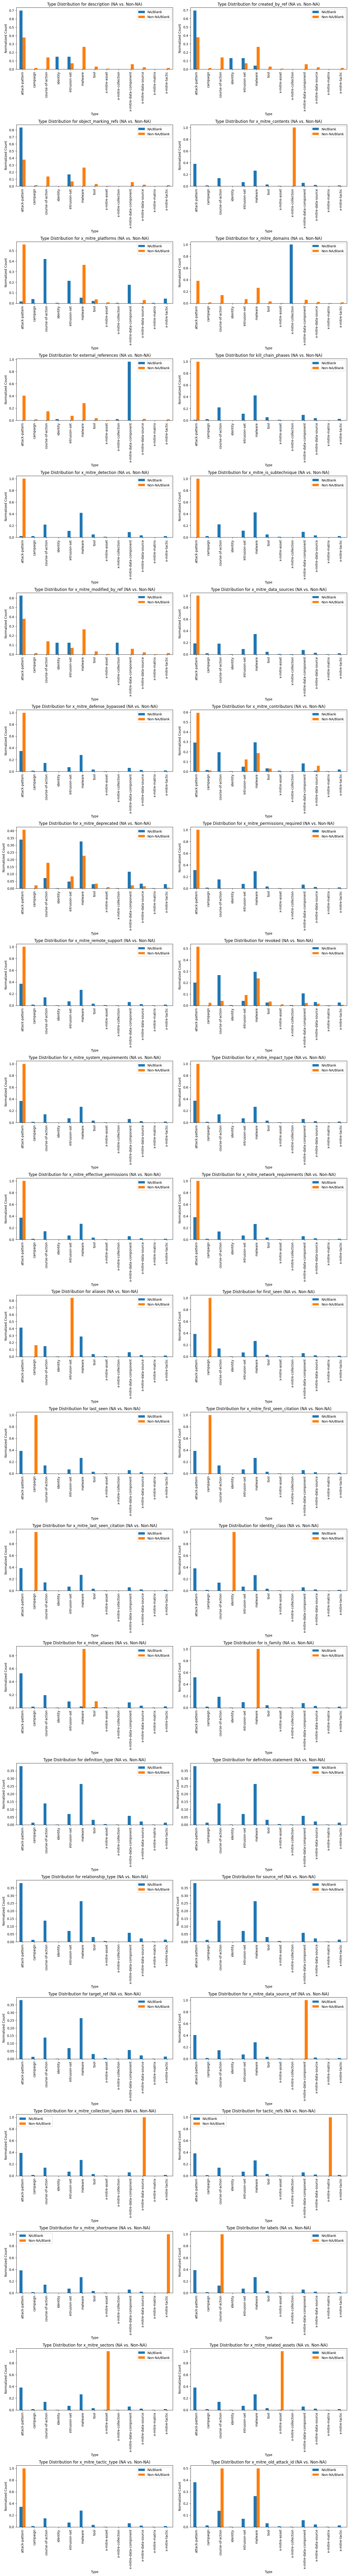

In [92]:
# Identify columns with NA/Blank fields
columns_with_na = [col for col in sdos.columns if sdos[col].isna().any()]

# Set up the plot grid
n_cols = 2
n_rows = (len(columns_with_na) + 1) // n_cols
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(15, n_rows*5))
axes = axes.flatten()

for i, column in enumerate(columns_with_na):
    # Data for NA/Blank values
    na_types = sdos[sdos[column].isna()]['type'].value_counts(normalize=True)
    # Data for Non-NA/Blank values
    non_na_types = sdos[sdos[column].notna()]['type'].value_counts(normalize=True)

    # Combine both Series for comparison
    combined_df = pd.DataFrame({'NA/Blank': na_types, 'Non-NA/Blank': non_na_types}).fillna(0)

    # Plot
    combined_df.plot(kind='bar', ax=axes[i])
    axes[i].set_title(f'Type Distribution for {column} (NA vs. Non-NA)')
    axes[i].set_ylabel('Normalized Count')
    axes[i].set_xlabel('Type')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()


The next cell shows you how to find the set of least common denominators, or in other words, the properties that exist on *every* property!

In [65]:
sdos_dropna = sdos.dropna(axis=1, how='any')

print('Features common to every SDO (excluding SRO):\n')
for feature in sorted(sdos_dropna.columns):
  print(feature)

Features common to every SDO (excluding SRO):

created
id
modified
name
spec_version
type
x_mitre_attack_spec_version
x_mitre_version


In [67]:
# Get unique object types
object_types = sdos['type'].unique()

# Iterate through each object type
for obj_type in sorted(object_types):
    # Create a subset DataFrame for the current object type
    subset_df = sdos[sdos['type'] == obj_type]

    # Drop columns if every sample is NaN for this subset
    # The column will only be dropped if it is NaN for every instance!
    subset_df_clean = subset_df.dropna(axis=1, how='all')

    # Print the non-null properties for the current object type
    print(f"Potentially required properties for object type '{obj_type}':")
    for feature in sorted(subset_df_clean.columns):
        print(feature)
    print("\n")  # Print a newline for better readability between object types

Potentially required properties for object type 'attack-pattern':
created
created_by_ref
description
external_references
id
kill_chain_phases
modified
name
object_marking_refs
revoked
spec_version
type
x_mitre_attack_spec_version
x_mitre_contributors
x_mitre_data_sources
x_mitre_defense_bypassed
x_mitre_deprecated
x_mitre_detection
x_mitre_domains
x_mitre_effective_permissions
x_mitre_impact_type
x_mitre_is_subtechnique
x_mitre_modified_by_ref
x_mitre_network_requirements
x_mitre_permissions_required
x_mitre_platforms
x_mitre_remote_support
x_mitre_system_requirements
x_mitre_tactic_type
x_mitre_version


Potentially required properties for object type 'campaign':
aliases
created
created_by_ref
description
external_references
first_seen
id
last_seen
modified
name
object_marking_refs
revoked
spec_version
type
x_mitre_attack_spec_version
x_mitre_contributors
x_mitre_deprecated
x_mitre_domains
x_mitre_first_seen_citation
x_mitre_last_seen_citation
x_mitre_modified_by_ref
x_mitre_version



### Generating Reports

Next we'll experiment with generating markdown tables:

In [71]:
def summarize_properties(obj_type):
  # We know every 
  counts_all = sdos[sdos['type']==obj_type].count()
  counts_non_zero = counts_all[counts_all > 0].sort_index()

  # Convert Series to DataFrame for modification
  counts_df = pd.DataFrame(counts_non_zero, columns=['Count'])

  total_instances = max(counts_df.values)[0]

  # Add 'Required in ATT&CK' column based on the count
  counts_df['Required in ATT&CK'] = counts_df['Count'].apply(
      lambda x:
        f'True ({x}/{total_instances})'
        if x == total_instances
        else f'False ({x}/{total_instances})'
  )

  # Convert the index to a non-index column called 'Property'
  objects = counts_df.reset_index(drop=False)
  objects.rename(columns={'index': 'Property'}, inplace=True)

  print(objects.to_markdown(index=False))

  print('Possible properties:', [i for i in counts_df.index])

print("TOOL:")
summarize_properties('tool')
print("SOFTWARE:")
summarize_properties('malware')

TOOL:
| Property                    |   Count | Required in ATT&CK   |
|:----------------------------|--------:|:---------------------|
| created                     |      88 | True (88/88)         |
| created_by_ref              |      88 | True (88/88)         |
| description                 |      88 | True (88/88)         |
| external_references         |      88 | True (88/88)         |
| id                          |      88 | True (88/88)         |
| modified                    |      88 | True (88/88)         |
| name                        |      88 | True (88/88)         |
| object_marking_refs         |      88 | True (88/88)         |
| revoked                     |      56 | False (56/88)        |
| spec_version                |      88 | True (88/88)         |
| type                        |      88 | True (88/88)         |
| x_mitre_aliases             |      77 | False (77/88)        |
| x_mitre_attack_spec_version |      88 | True (88/88)         |
| x_mitre_contribut

In [ ]:
def summarize_properties_multi(obj_types):
    # List to hold DataFrame for each object type
    df_list = []

    for obj_type in obj_types:
        counts_all = sdos[sdos['type']==obj_type].count()
        counts_non_zero = counts_all[counts_all > 0].sort_index()

        # Convert Series to DataFrame for modification
        counts_df = pd.DataFrame(counts_non_zero, columns=['Count'])

        total_instances = max(counts_df.values)[0]

        # Add 'Required in ATT&CK' column based on the count
        counts_df['Required in ATT&CK'] = counts_df['Count'].apply(
            lambda x:
            f'True ({x}/{total_instances})'
            if x == total_instances
            else f'False ({x}/{total_instances})'
        )

        # Add an object type column to differentiate between types in the final table
        counts_df['Object Type'] = obj_type

        # Convert the index to a non-index column called 'Property'
        objects = counts_df.reset_index(drop=False)
        objects.rename(columns={'index': 'Property'}, inplace=True)

        # Append the DataFrame to our list
        df_list.append(objects)

    # Concatenate all DataFrames in the list
    merged_df = pd.concat(df_list, ignore_index=True)

    # Optionally, sort by object type and then property for readability
    merged_df.sort_values(by=['Object Type', 'Property'], inplace=True)

    # Print the merged DataFrame
    print(merged_df.to_markdown(index=False))

    # Print possible properties, now aggregated and possibly redundant across types
    print('Possible properties:', sorted(set(merged_df['Property'])))

# Example call with multiple object types
summarize_properties_multi(['tool', 'malware'])


| Property                    |   Count | Required in ATT&CK   | Object Type   |
|:----------------------------|--------:|:---------------------|:--------------|
| created                     |     702 | True (702/702)       | malware       |
| created_by_ref              |     701 | False (701/702)      | malware       |
| description                 |     702 | True (702/702)       | malware       |
| external_references         |     702 | True (702/702)       | malware       |
| id                          |     702 | True (702/702)       | malware       |
| is_family                   |     702 | True (702/702)       | malware       |
| modified                    |     702 | True (702/702)       | malware       |
| name                        |     702 | True (702/702)       | malware       |
| object_marking_refs         |     702 | True (702/702)       | malware       |
| revoked                     |     274 | False (274/702)      | malware       |
| spec_version              

In [110]:
def summarize_properties_by_type(obj_types):
    # Initialize a dictionary to hold property data
    property_data = {}

    # Process each object type
    for obj_type in obj_types:
        counts_all = sdos[sdos['type'] == obj_type].count()
        total_instances = len(sdos[sdos['type'] == obj_type])

        # Iterate over each property in this object type
        for property, count in counts_all.items():
            if count > 0:  # Only include properties with at least one occurrence
                if property not in property_data:
                    property_data[property] = {}

                # Determine if the property is required or optional
                status = f'Required ({count}/{total_instances})' if count == total_instances else f'Optional ({count}/{total_instances})'
                property_data[property][obj_type] = status

    # Convert the nested dictionary into a DataFrame
    df_properties = pd.DataFrame.from_dict(property_data, orient='index', columns=obj_types).fillna('')

    # Reset index to turn the index into a proper column
    df_properties.reset_index(inplace=True)
    df_properties.rename(columns={'index': 'Property'}, inplace=True)

    # Print the DataFrame in markdown format
    print(df_properties.to_markdown(index=False))

# Example call with multiple object types
summarize_properties_by_type([
    "attack-pattern",
    "campaign",
    "course-of-action",
    "identity",
    "intrusion-set",
    "malware",
    # "marking-definition",
    # "note",
    # "relationship",
    "tool",
    "x-mitre-asset",
    "x-mitre-collection",
    "x-mitre-data-source",
    "x-mitre-data-component",
    "x-mitre-matrix",
    "x-mitre-tactic",
])

| Property                      | attack-pattern       | campaign         | course-of-action   | identity       | intrusion-set      | malware            | tool             | x-mitre-asset    | x-mitre-collection   | x-mitre-data-source   | x-mitre-data-component   | x-mitre-matrix   | x-mitre-tactic   |
|:------------------------------|:---------------------|:-----------------|:-------------------|:---------------|:-------------------|:-------------------|:-----------------|:-----------------|:---------------------|:----------------------|:-------------------------|:-----------------|:-----------------|
| type                          | Required (1062/1062) | Required (37/37) | Required (385/385) | Required (3/3) | Required (195/195) | Required (736/736) | Required (88/88) | Required (14/14) | Required (3/3)       | Required (61/61)      | Required (161/161)       | Required (4/4)   | Required (40/40) |
| id                            | Required (1062/1062) | Required (37/37) | Requir

The next function produces a JSON summary for each object type:

In [ ]:
import json

def build_json_objects_for_types(obj_types):
    # Initialize a dictionary to hold the JSON structure for each obj_type
    json_objects = {}

    # Process each object type
    for obj_type in obj_types:
        counts_all = sdos[sdos['type'] == obj_type].count()
        total_instances = len(sdos[sdos['type'] == obj_type])

        # Initialize a dictionary for the current obj_type
        json_objects[obj_type] = {}

        # Iterate over each property in this object type
        for property, count in counts_all.items():
            # Exclude properties with a count of zero
            if count == 0:
                continue

            # Mark property as "Required" if count is equal to total_instances, otherwise "Optional"
            json_objects[obj_type][property] = "Required" if count == total_instances else "Optional"

    # Convert each dictionary into a JSON string and print
    for obj_type, properties in json_objects.items():
        print(f"{obj_type}:")
        print(json.dumps(properties, indent=2))
        print()

# Example call with multiple object types
build_json_objects_for_types([
    "attack-pattern",
    "campaign",
    "course-of-action",
    "identity",
    "intrusion-set",
    "malware",
    # "marking-definition",
    # "note",
    # "relationship",
    "tool",
    "x-mitre-asset",
    "x-mitre-collection",
    "x-mitre-data-source",
    "x-mitre-data-component",
    "x-mitre-matrix",
    "x-mitre-tactic",
])

attack-pattern:
{
  "type": "Required",
  "id": "Required",
  "spec_version": "Required",
  "x_mitre_attack_spec_version": "Required",
  "name": "Required",
  "x_mitre_version": "Required",
  "description": "Optional",
  "created_by_ref": "Optional",
  "created": "Required",
  "modified": "Required",
  "object_marking_refs": "Optional",
  "x_mitre_platforms": "Optional",
  "x_mitre_domains": "Required",
  "external_references": "Required",
  "kill_chain_phases": "Optional",
  "x_mitre_detection": "Optional",
  "x_mitre_is_subtechnique": "Required",
  "x_mitre_modified_by_ref": "Optional",
  "x_mitre_data_sources": "Optional",
  "x_mitre_defense_bypassed": "Optional",
  "x_mitre_contributors": "Optional",
  "x_mitre_deprecated": "Optional",
  "x_mitre_permissions_required": "Optional",
  "x_mitre_remote_support": "Optional",
  "revoked": "Optional",
  "x_mitre_system_requirements": "Optional",
  "x_mitre_impact_type": "Optional",
  "x_mitre_effective_permissions": "Optional",
  "x_mitre